<h1>Week 4</h1>

<h2>Monday</h2>

Note, this week's log will be quite ranty/sarcastic and all that jazz. <i>(This was written when the author was grumpy. You'll be glad to know that by the end of the day, the author was not as grumpy)</i>

The goal of this week is to train the CNN to differentiate between images of galaxies and those that are not.

<i>...It did not start well...</i>

First, the prgram didn't run properly after a weekend. At least, not without warnings. It just produced '[0.]' for every epoch.

Then, on second attempt, it ran, but produced this: 

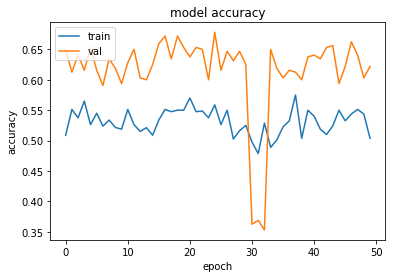

(note to self, for inserting images into the markdown section of Jupyter Notebook, don't bother witht the syntax of inserting an image here. From notebook 5.0.0 onwards, you can drag and drop)

Unfortunately, I forgot to take a screenshot of the output before I changed the code and let it run. Again, it produced all '[0]', but this time with more decimal places.

Also, the accuracy graph should really look something like this (from Tensorflow tutorial on Tensorflow for Poets 5th lesson):

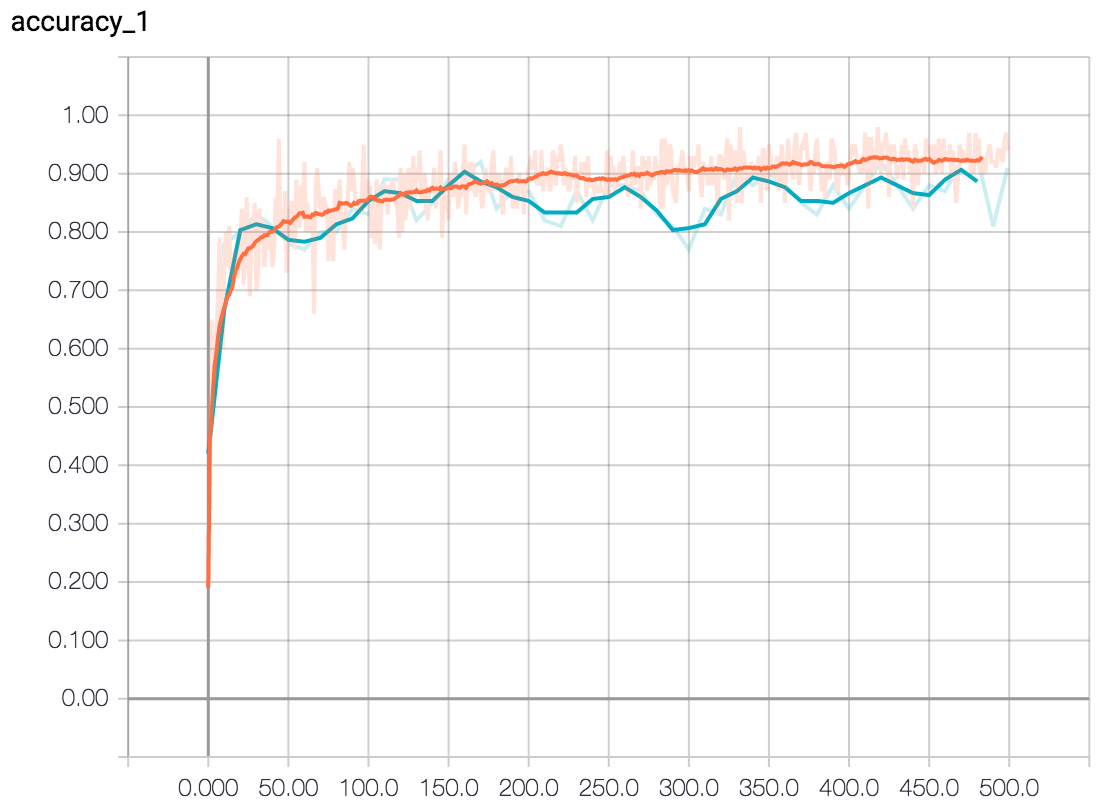


To check it wasn't playing up with the stars folder, I used the galaxies folder and tried again, but with the other folder being the 'non-galaxies' folder, which produced this:

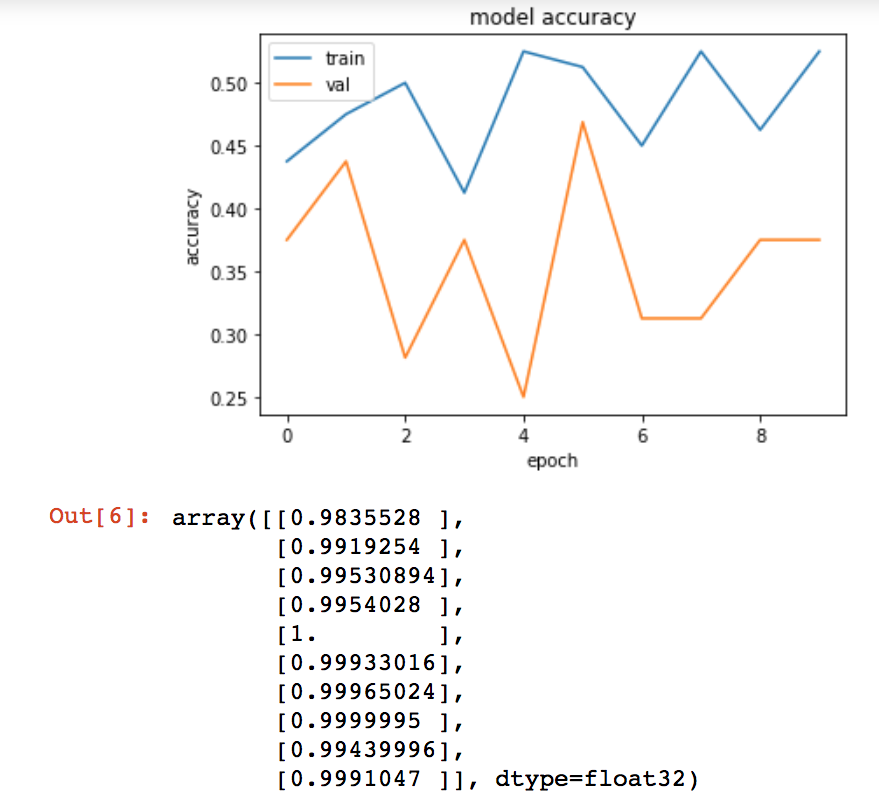

Which is basically the same issue, but with 1 instead of 0 as output.

So, a bug it is!

If it was a bug, then it can be fixed but using the original code sourced from GitHub, and just change the paths to the image directories, making sure the file structures are the same. Which is what I did.

<h2>Tuesday</h2>

But then: the original code doesn't work. -_-

<i>My opinion on this matter: "..................................."</i>

The graph showed that the values produced for accuracy wildly fluctuates. While overfitting is possible, the best explanation is due to the learning rate being too high (currently set at 0.001 as default, through this bit:

<code>model.compile(loss='binary_crossentropy',
                    <b>optimizer='rmsprop'</b>,
                     metrics=['accuracy'])</code>)

(<i>...And I'm not sure how to tweak the learning rate in this context.</i>) <= for solution, scroll down. It's actually, not very difficult at all.

Another possibility is that I just didn't run for enough epochs - which is possible, where the fluctuations are around, but can be small enough when ran over a large number of epochs such that the fluctuations can be ignored/averaged?

So, while the GitHub version of the code runs, I'm trying some new code (proper one from Keras documentation - hope it works!)

This command line code is very useful for listing all file names in one column in a <code>.csv</code> file:

<code>$ 'ls' > files.csv</code> <3<3<3

<h2>Wednesday</h2>

Ok, new day. 

I left the code to run over 150 epochs yesterday overnight, and I'm starting to get an accuracy for around 75-80\%. Why a range? Because the validation accuracy is still fluctuating! So I spent this morning tweaking to see if a different learning rate within the optimiser (I was using 'RMSprop', where i changed the learning rate from 0.001 to 0.0001), or an entirely different optimizer (I tried to use 'Adadelta') will help. 

To change the optimiser (I really overcomplicated this im my head).

1) define a variable as your optimizer with the settings you want.<br>
2) in the <code>model.compile()</code> part, put <code>optimizer =<i> your_variable </i></code>. 

It's that simple, in fact, it was at the top of one of the blogs I looked at but have somehow glossed over it.

I have also implemented a seed to see if I can get somewhat consistent results. The task for rest of the day is to get a ROC curve, and hopefully a precision recall curve. There's one more ongoing issue of I still have no idea how the images are labelled other than via the directory names, which will be interesting when it comes to generating the names for images for the test set.


This is the graph for 24 epochs (it took 32 minutes), which is better than the previous ones on this document, but not great. Changes include changing the input dim to 64, and added an L2 regulariser. You can clearly see that the validation set is fluctuating a lot, while the training set is fine. This means the data has been overfitted/step size too big (<i>later me:</i> actually, it's overfitted, the step size too big, batch size too small, it worked better with some other layers and it didn't have enough optimization. Other than all of that? It's fine.):

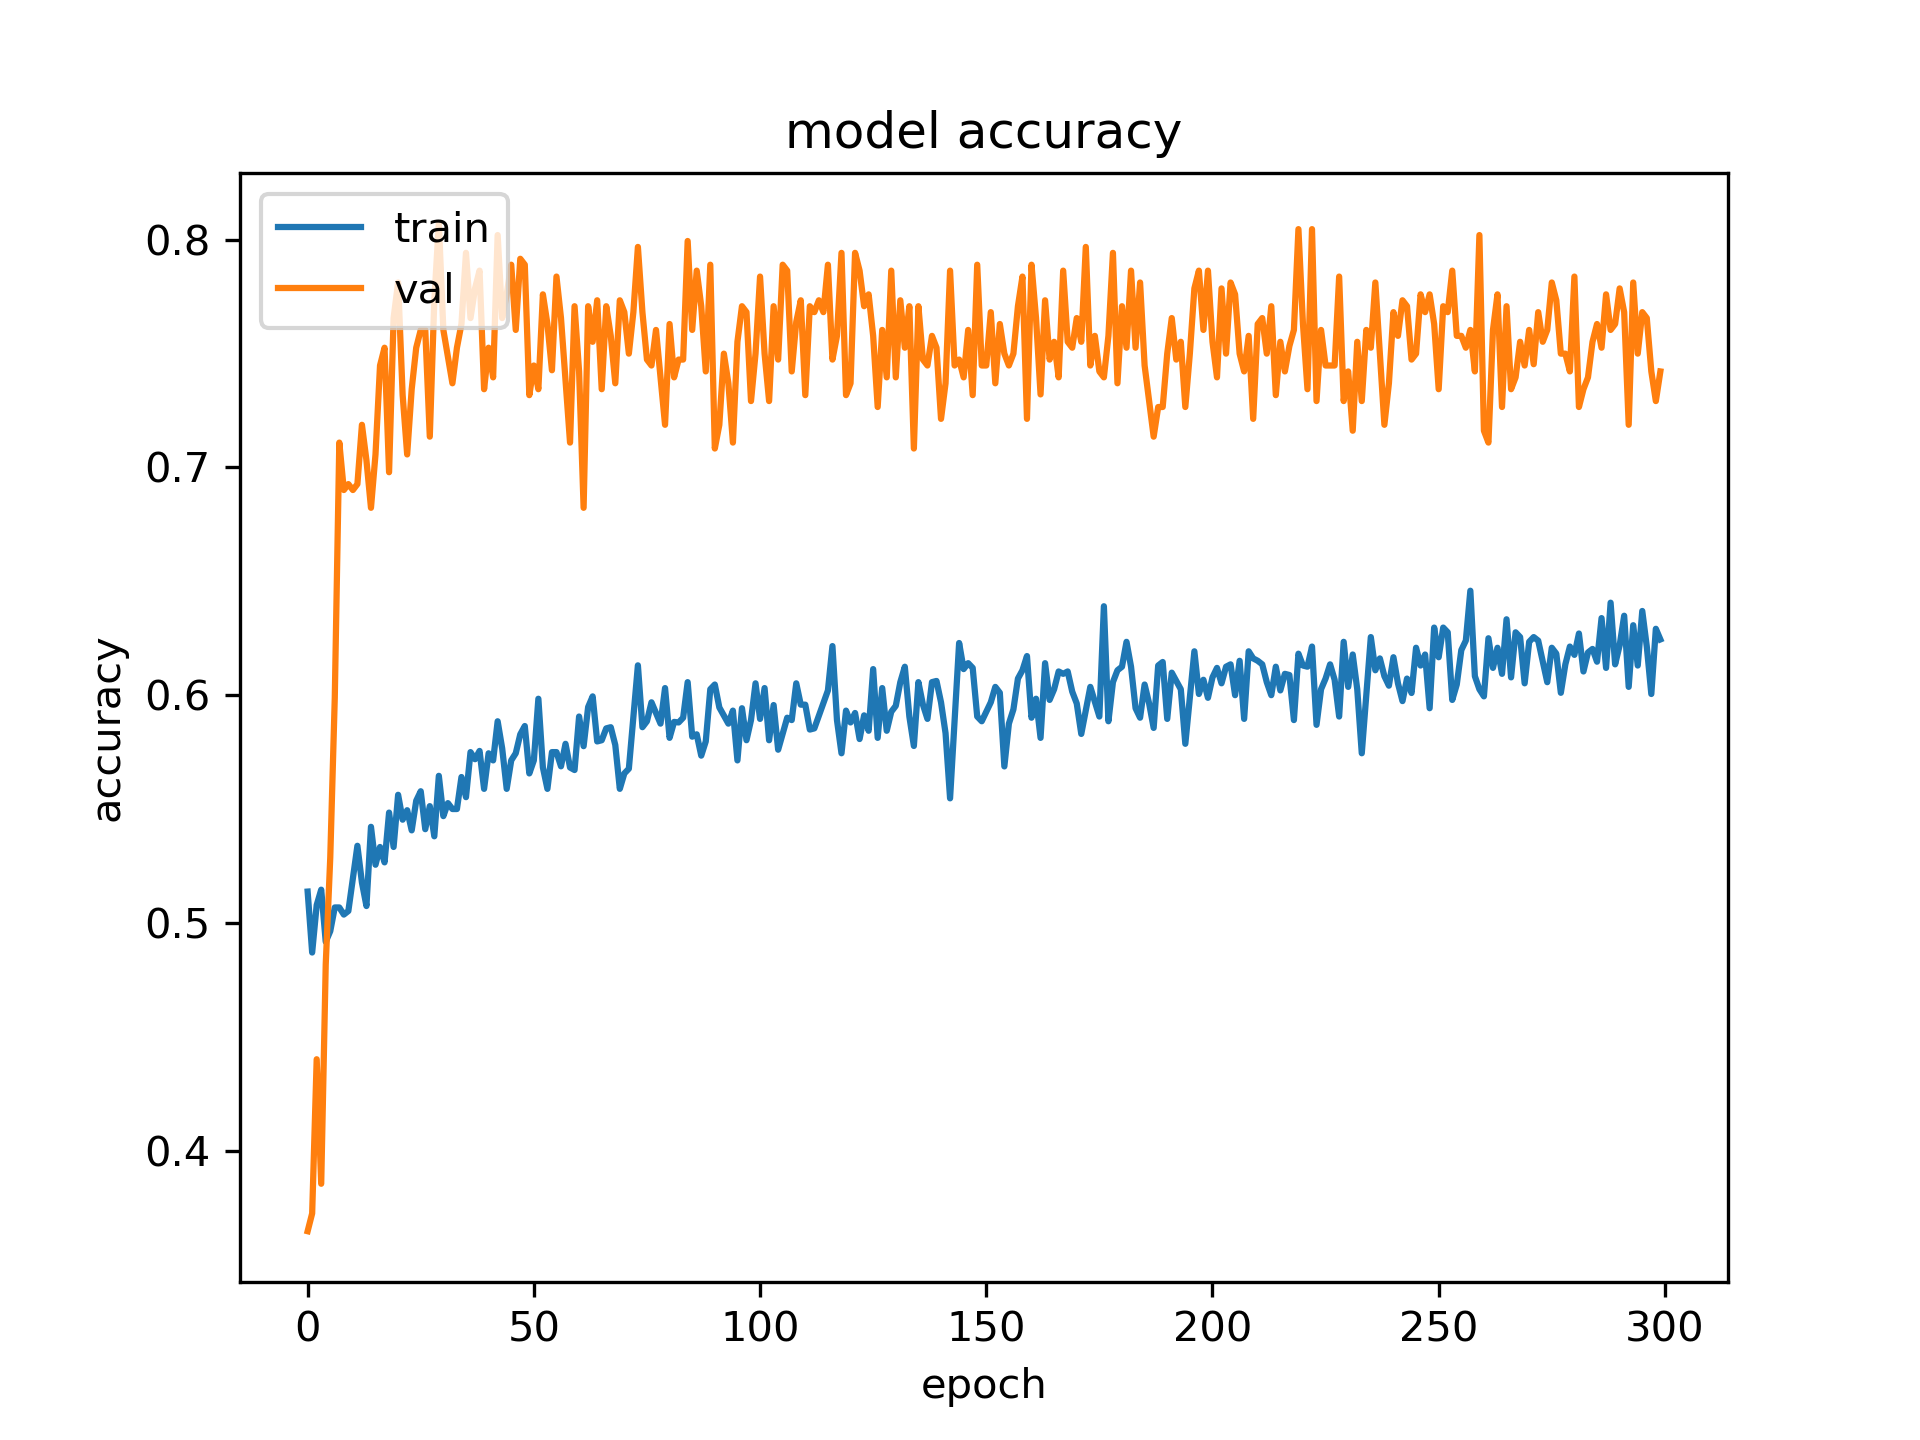

Changed the optimiser to 'Adam', and changed the learning rate to '0.0001' (default = '0.001'), ran the code for 7 epochs. I also changed the batch size to 32. You can see that both the training set and validation set curves are a lot smoother. While the validation set still fluctuates, the range is a lot more normal/managable. There is apparently a 'sweet spot' to learning rate, so I'll have a look into that. (the graph looks different because I changed the graph style in as a part of my attempt to have a live graph)

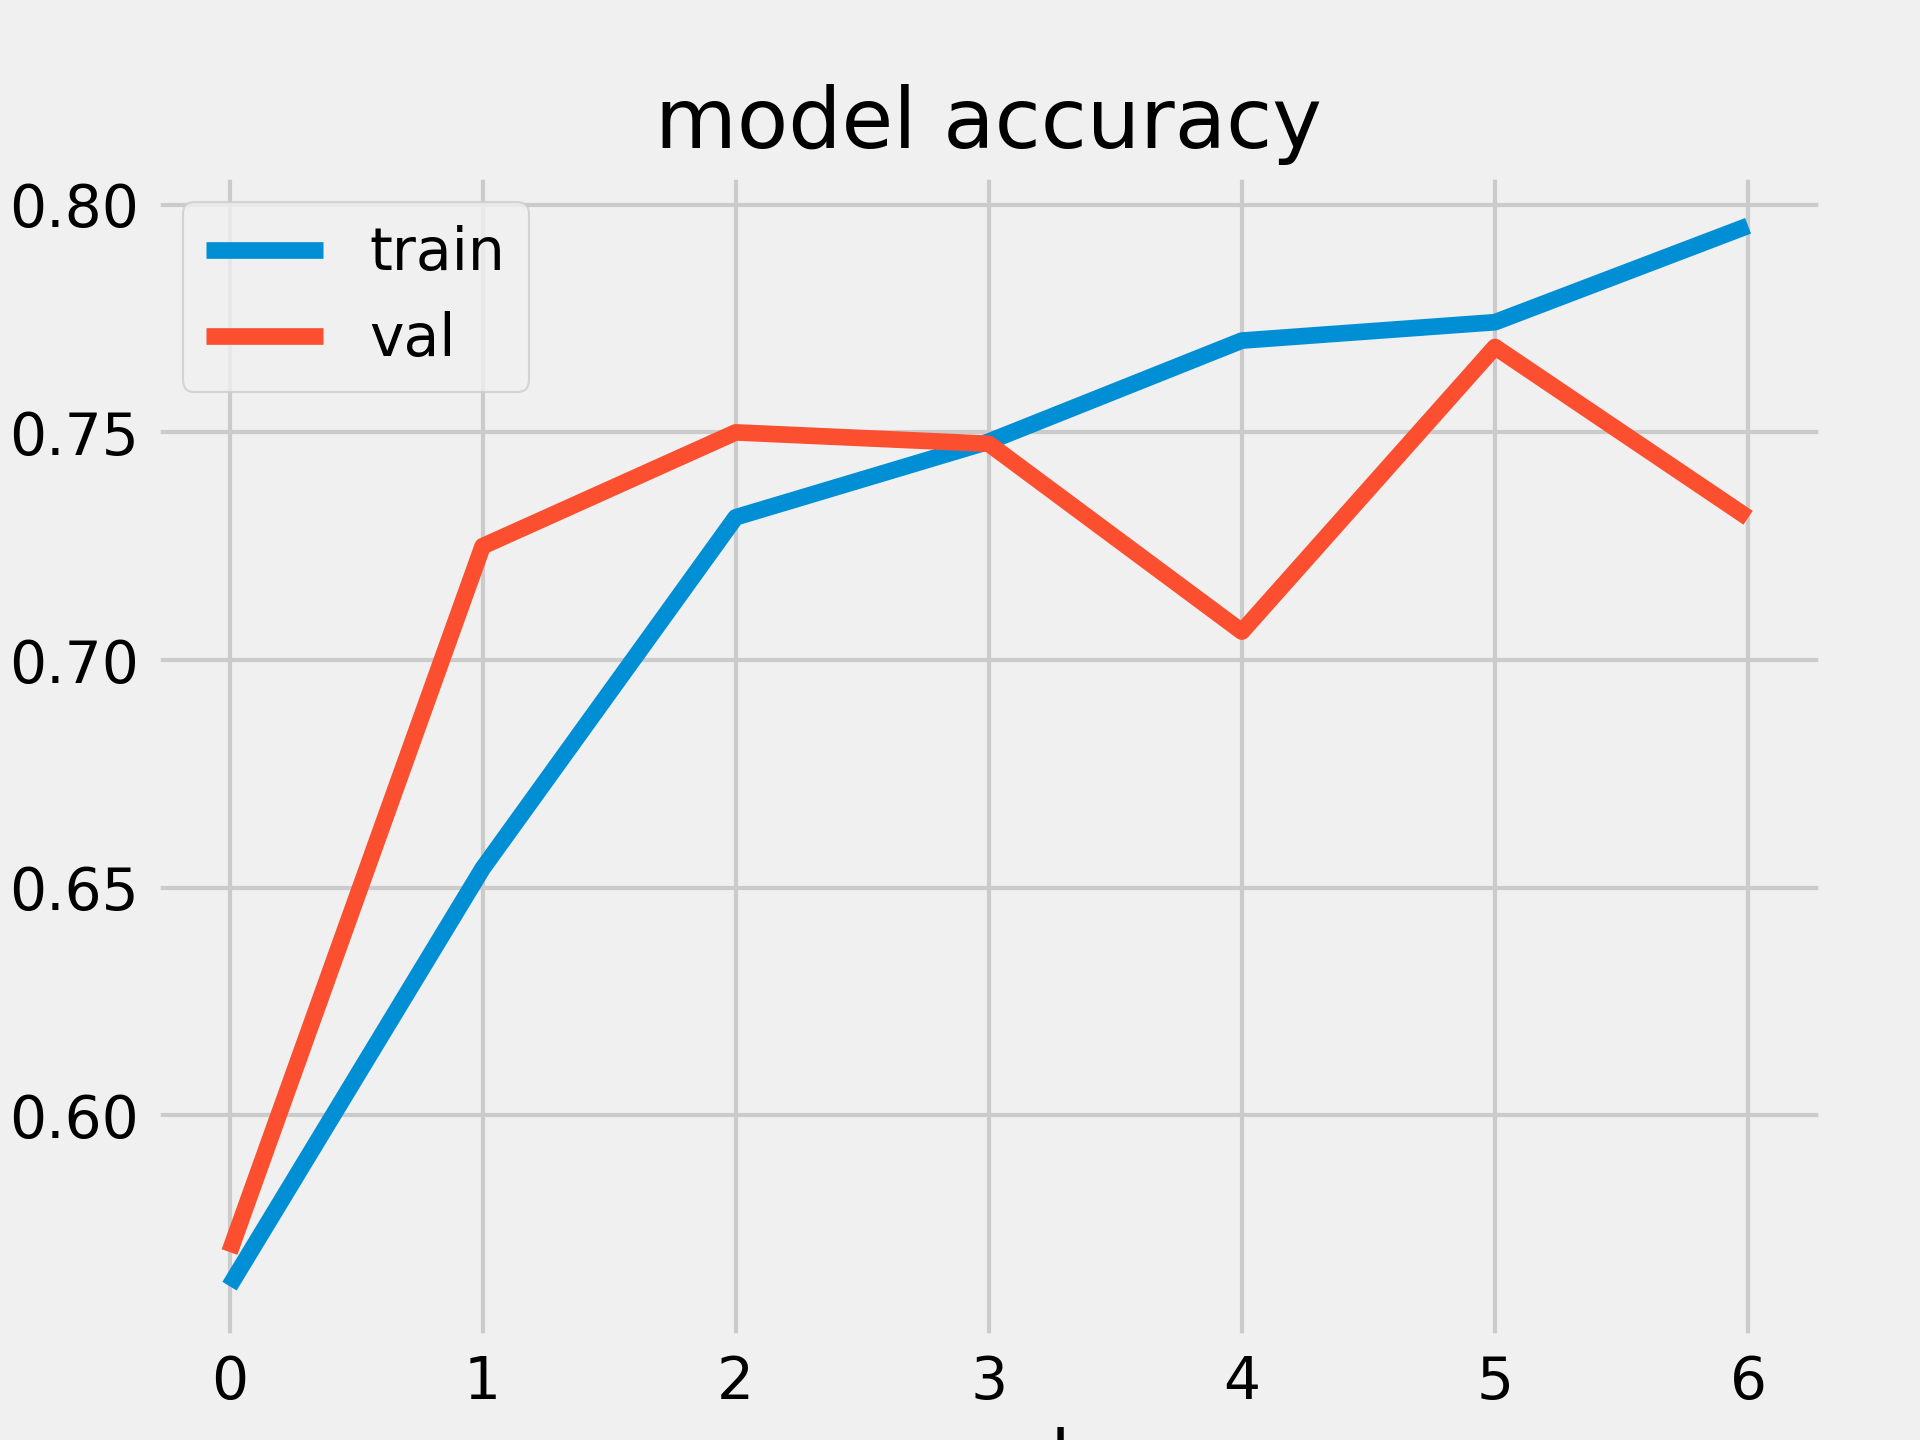

But yes, let's hope it stablises!

At the moment, I don't think that's the case - definitely not stablising, if anything, it's becoming very unstable. I then decided that it's not worth spending lots of time doing a live graph). The training set is looking very happy though (it's giving consistent results! :D ):

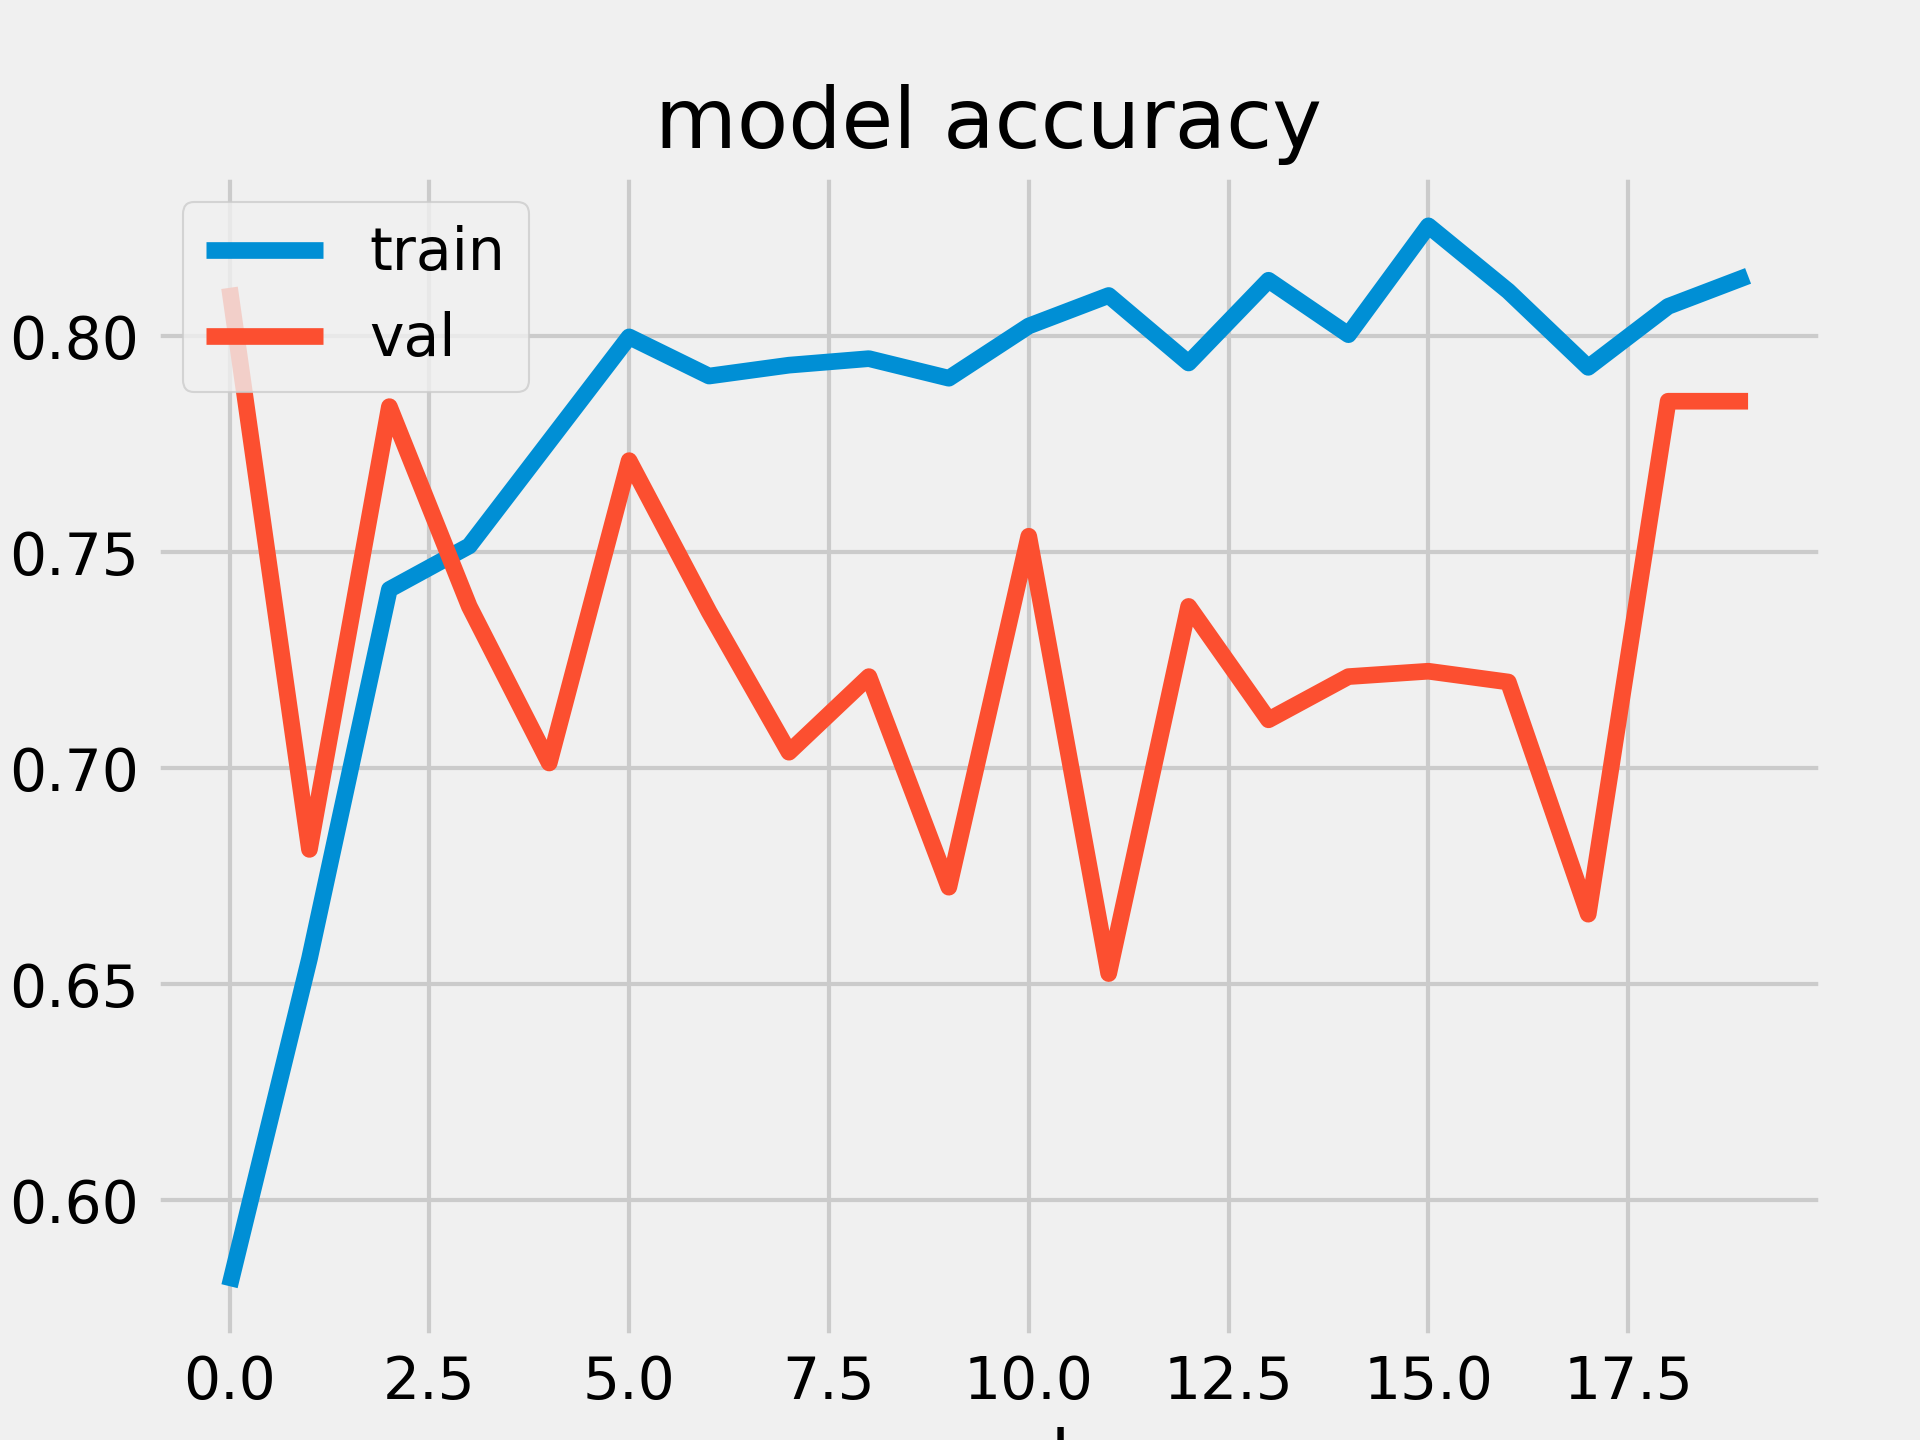

Ok, I changed the seed to '1337' instead of '1', and turned multiprocessing off, as suggested in one of the posts. Why '1337'? Because it's not 1. Ok, being serious, I changed it in the hopes that the results will be more consistent, because sometimes, putting 1 in a random number generator is not a good idea, and one of the comments just happened to use 1337, so I went with it. Hope this goes well!

PS, to estimate the amount of time for the program to finish, assume each epoch being 80 seconds, such that that the total time in minutes:

\begin{equation}
total\_time = \frac{no\_epochs*80}{60}
\end{equation}

Ok, so I turned off multi_processing, changed the batch size, and did some general tweaking, which generated the following graph after 20 epochs:

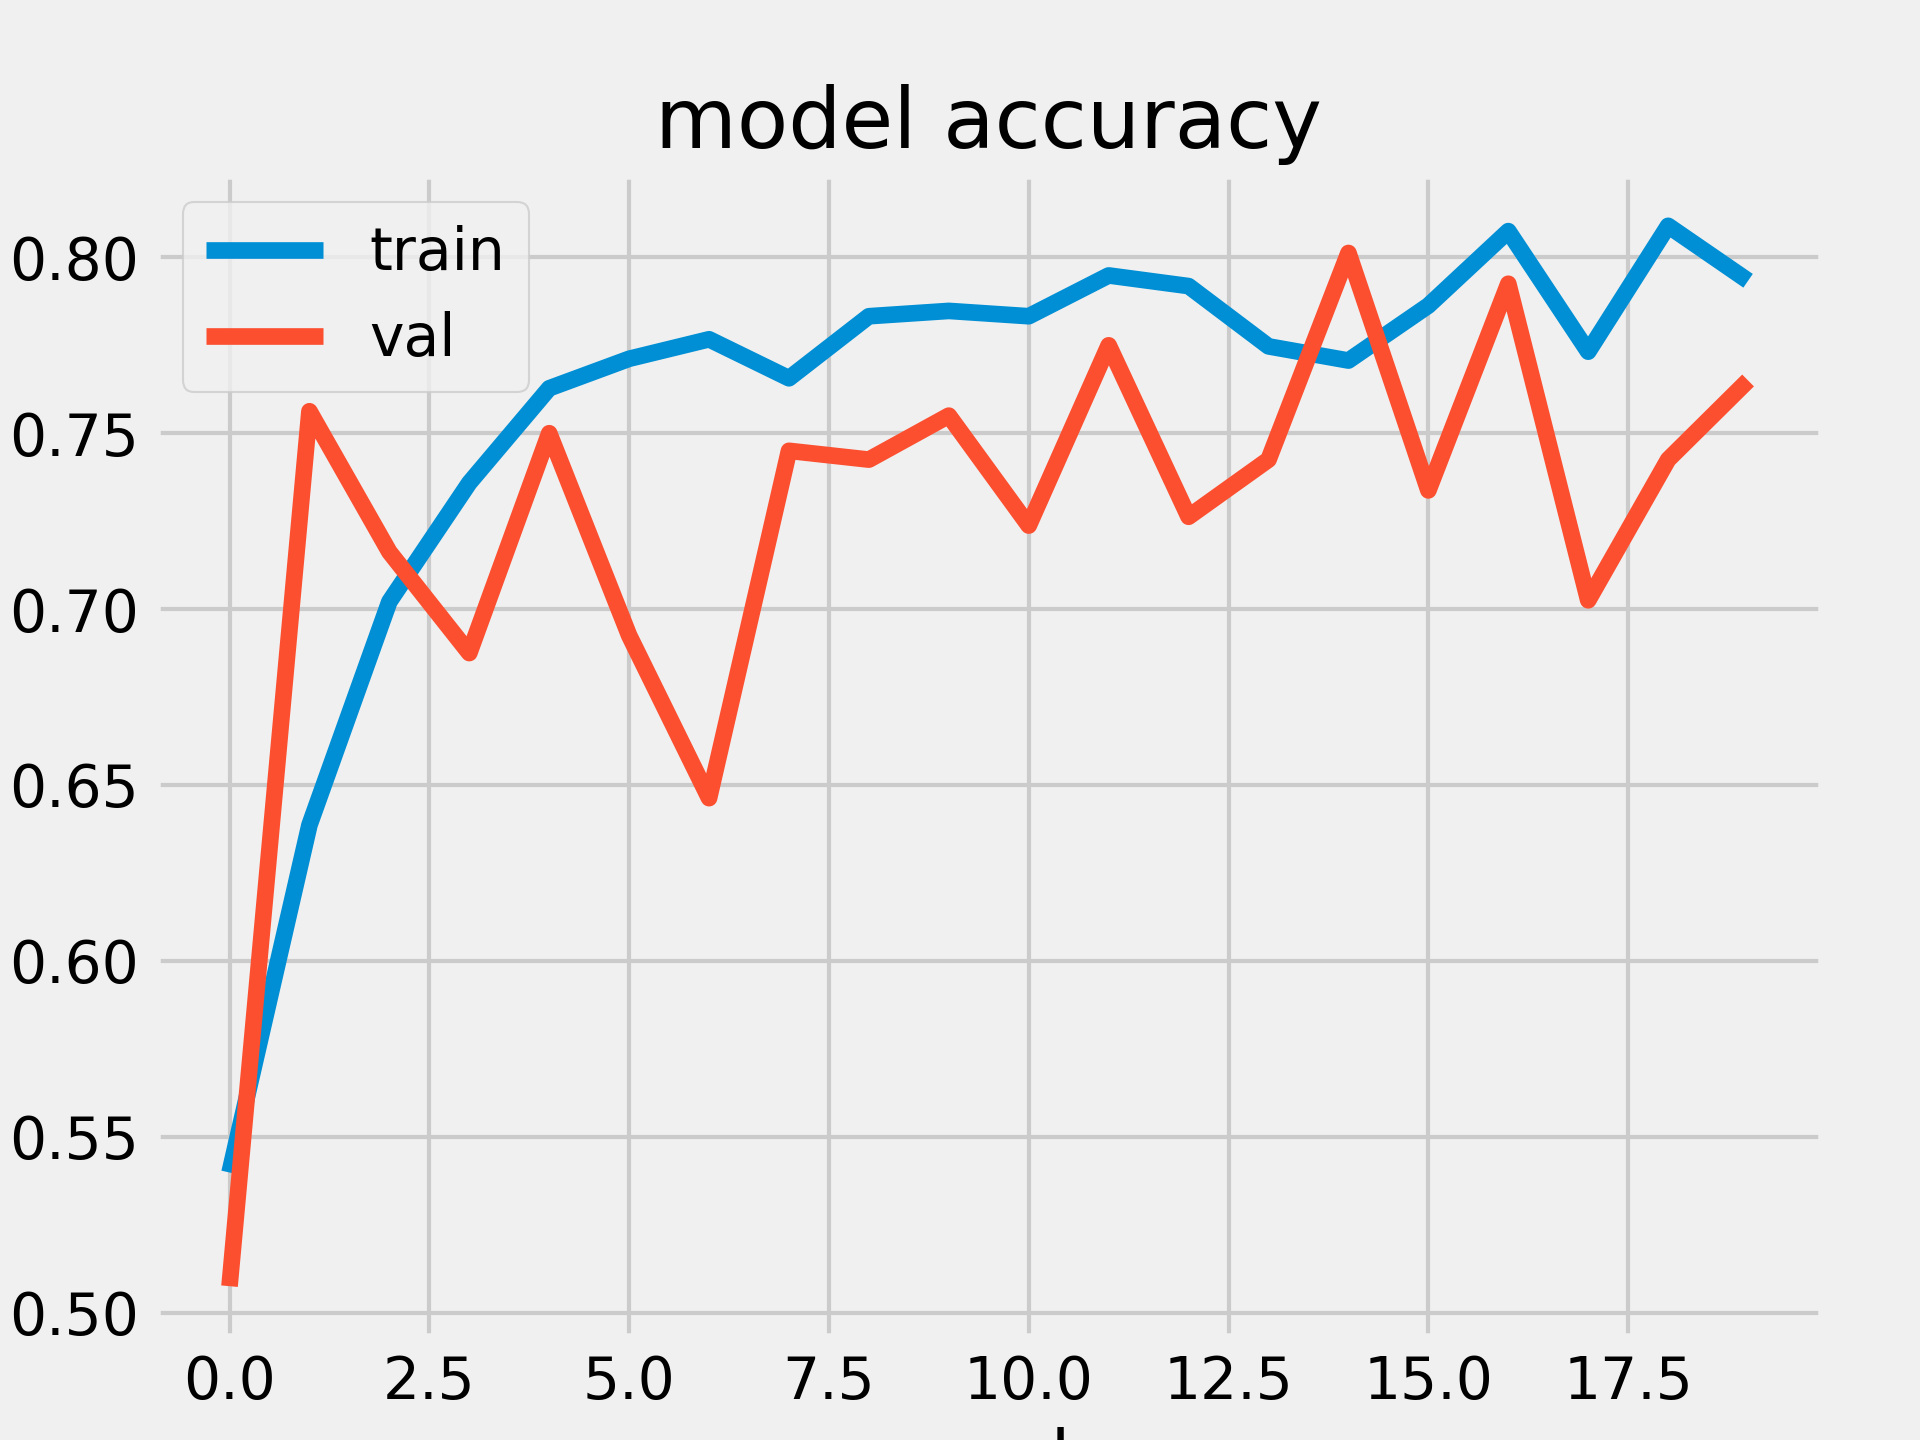

This is definitely an improvement. To make sure it's not a fluke, I'm running it again. Productive? No. Reassuring? Yes. But don't worry, I changed the NN structure a bit too, so I didn't run the same program twice. I added another dense layer, <code>model.add(Dense(64, activation='relu'))</code>,  and another dropout after that, <code>model.add(Dropout(0.5))</code>, then changed:

<code>model.add(Dense(1))</code><br>
<code>model.add(Activation('sigmoid')</code>

To:

<code>model.add(Dense(1, activation='sigmoid'))</code>

For ease of comprehension, just so that my life is easier when debugging. And yes, I have taken out <code>multiprocessing=True</code>. I have a feeling that it might have provided some noise to the program. So the trade off for a slightly slower program (not by that much actually) is a better output. I have also altered batch size from 32 to 128 (apparently, the wiggle room in loss is related to batch size. Larger batch = more wiggles in loss).

From that, I got a graph like this (still very stable!! The results are roughly consistent, and the validation curve is not going crazy!):

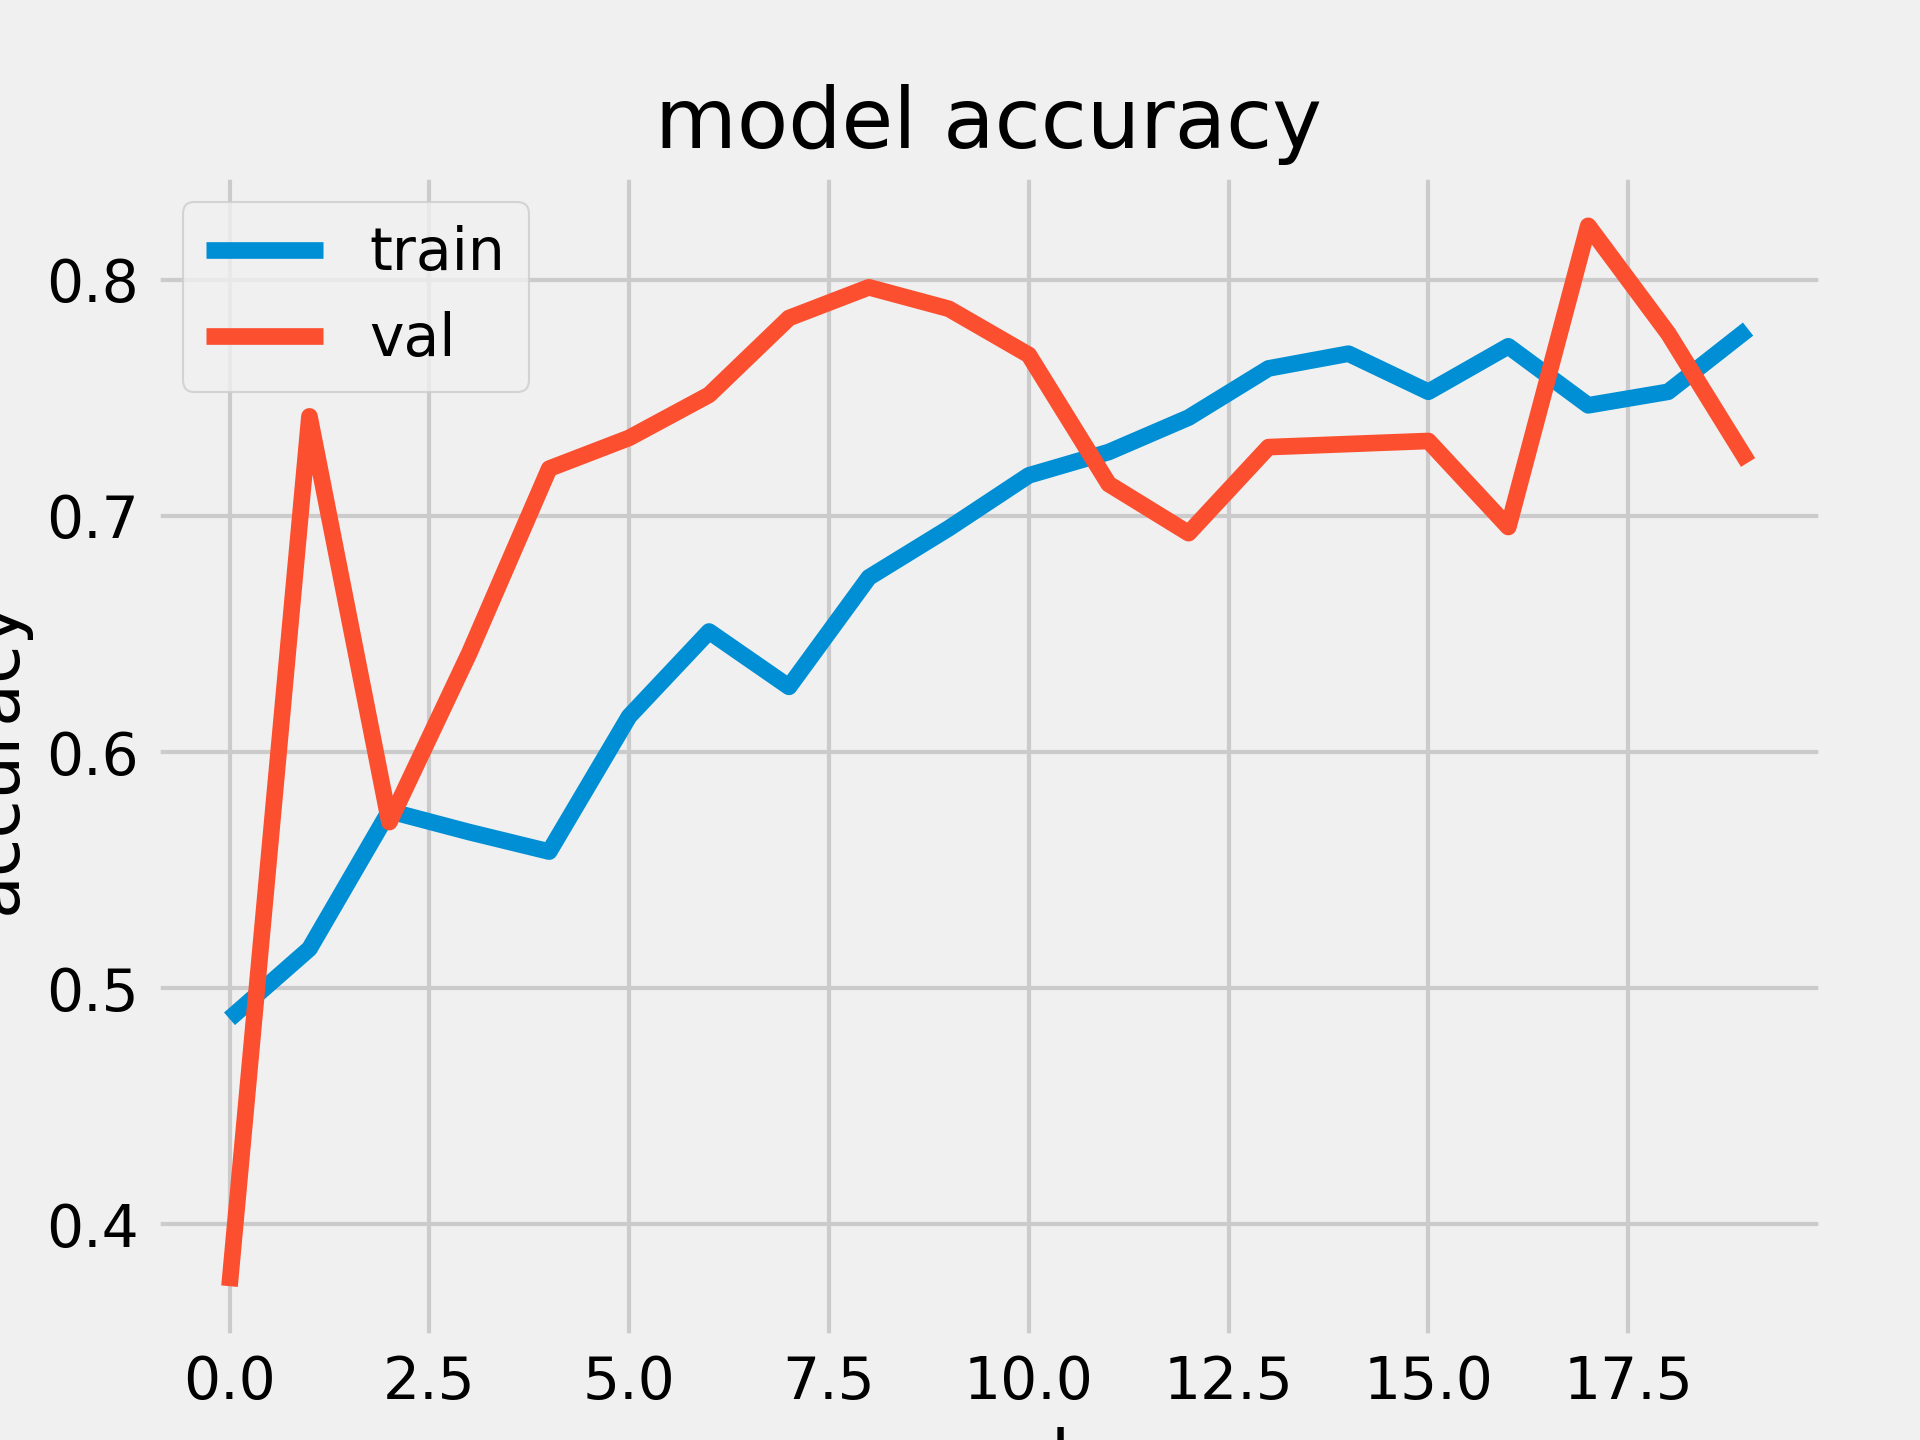

If this works after I run the code overnight, I will definitely be a happy bunny! 
   
&nbsp;&nbsp;&nbsp;||__||<br>
&#92;&#92;{^.^}//<br>


By my quick estimation of the amount of time it takes to run the program over 500 epochs, it should take just over 11 hours, so I will run 500 epochs tonight!

I will set:<br>
batch_size=160<br>
epochs=500<br>


Wait! Before I try this, apparently the nb-train_samples and the nb_validation_samples have to be the same as the number of files in the training and validation directory. So, after correction, my run time has changed to around 15 minutes per epoch (it used to be around 80s per epoch). Eek!!

<b>BUT!!</b> In another example I saw where they have 7909 breast cancer images (https://saksham-jain.com/p3.html), they used 1000 for <code>nb_train_samples</code> and 200 for <code>nb_validation_samples</code>. 

<i>Better try this.</i>

Ok, so I changed the values, and the run time is back to around 80s. This is good. The first <code>val_acc</code> is also 0.4505, another good sign. 

Second epoch, <code>val_acc</code> is 0.6172, again, another good sign.

Third epoch, <code>val_acc</code> is 0.7396, doing pretty good - hang in there, program!!!

<i>Say hello to consistency!!!!! Oooooh yes!</i>

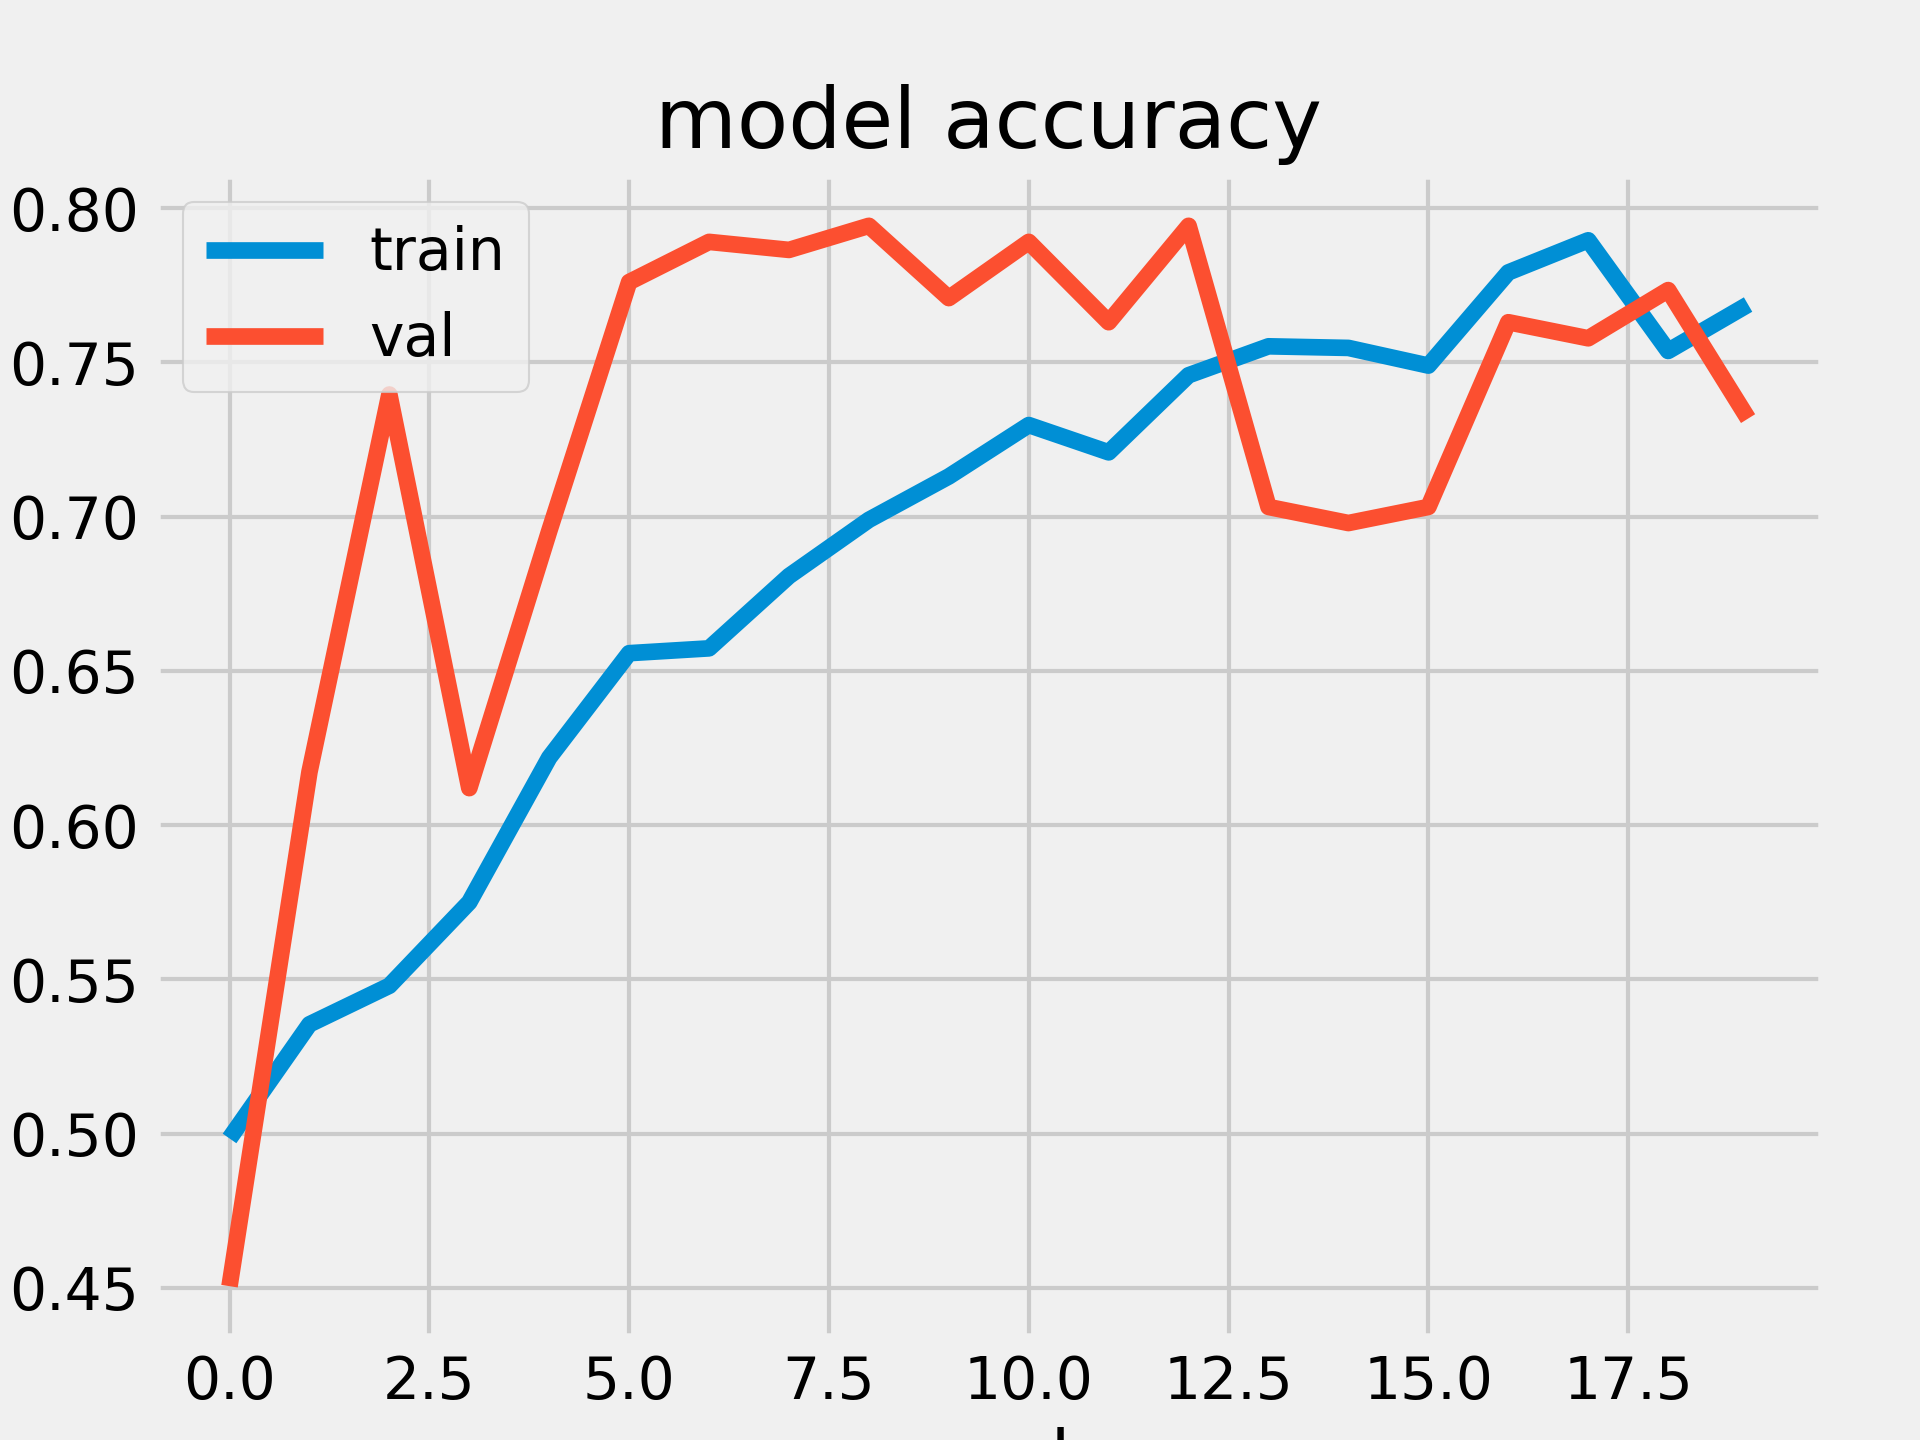

Dear tomorrow's self: if you have the time, try the code again, but with SGD optimiser, setting learning rate to be 1/10th of the default, and momentum as 0.9 (i.e. try out the lr, and have a non-zero momentum).

But yes, the overnight neural-net hyperparameters:

<code>
nb_train_samples = 2000<br>
nb_validation_samples = 400 # 800<br>
epochs = 300<br>
batch_size = 128<br>
# Seed random numbers<br>
np.random.seed(1337)
</code>

<i>...and all that jazz.</i>

Ok, after 300 epochs, the graph is like this:

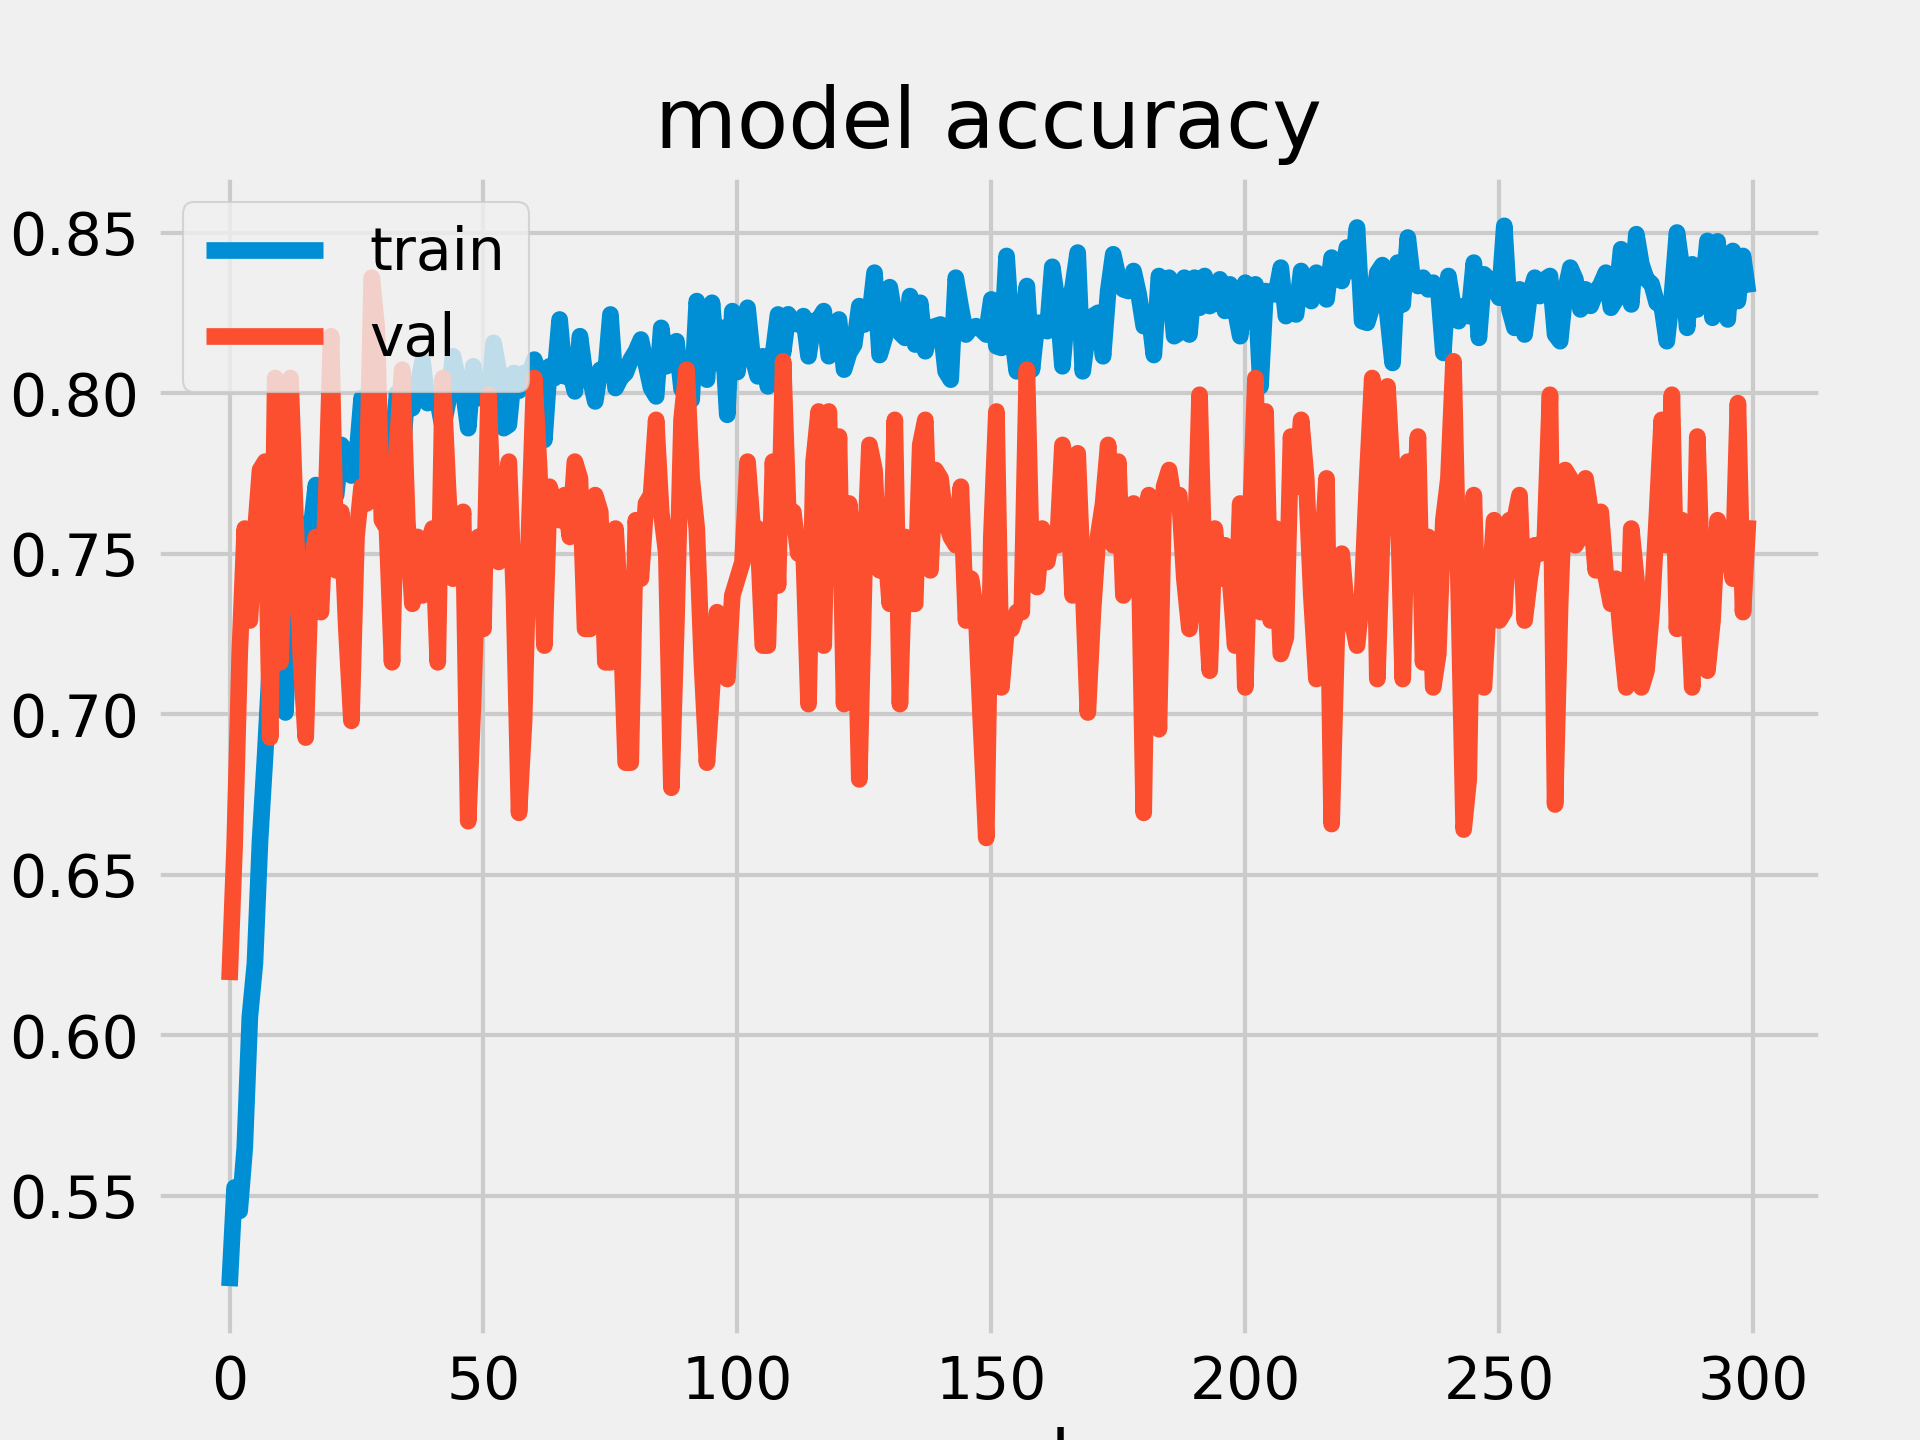

Still some fluctuations, not bad, but not great.

This attempt is for running for 300 epochs via SGD optimizer, with lr=0.001 and momentum = 0.9:

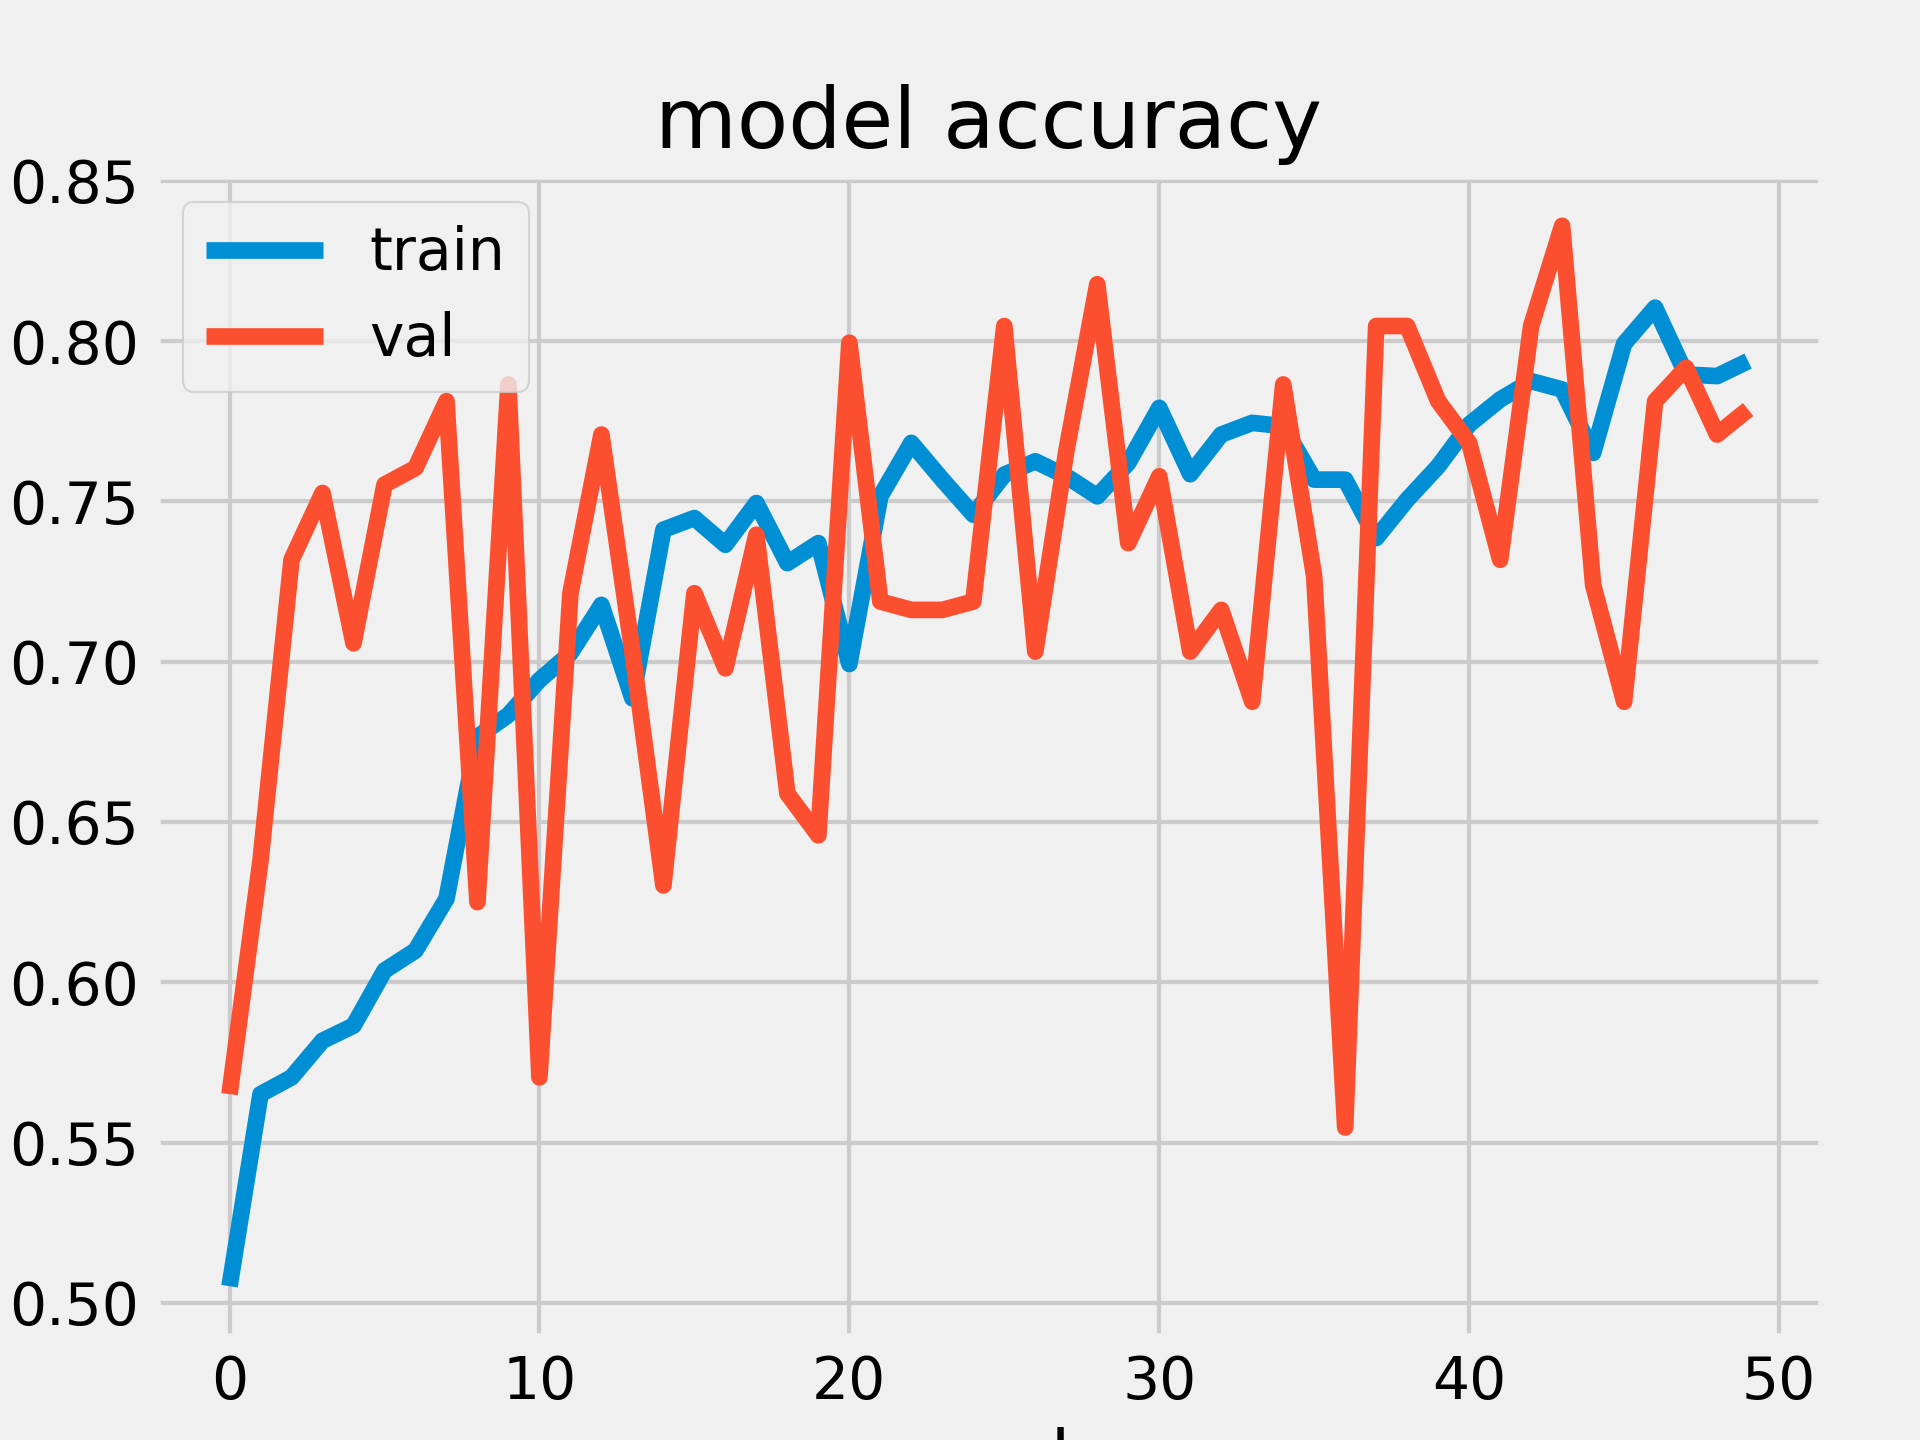

After reducing lr to lr=0.001:

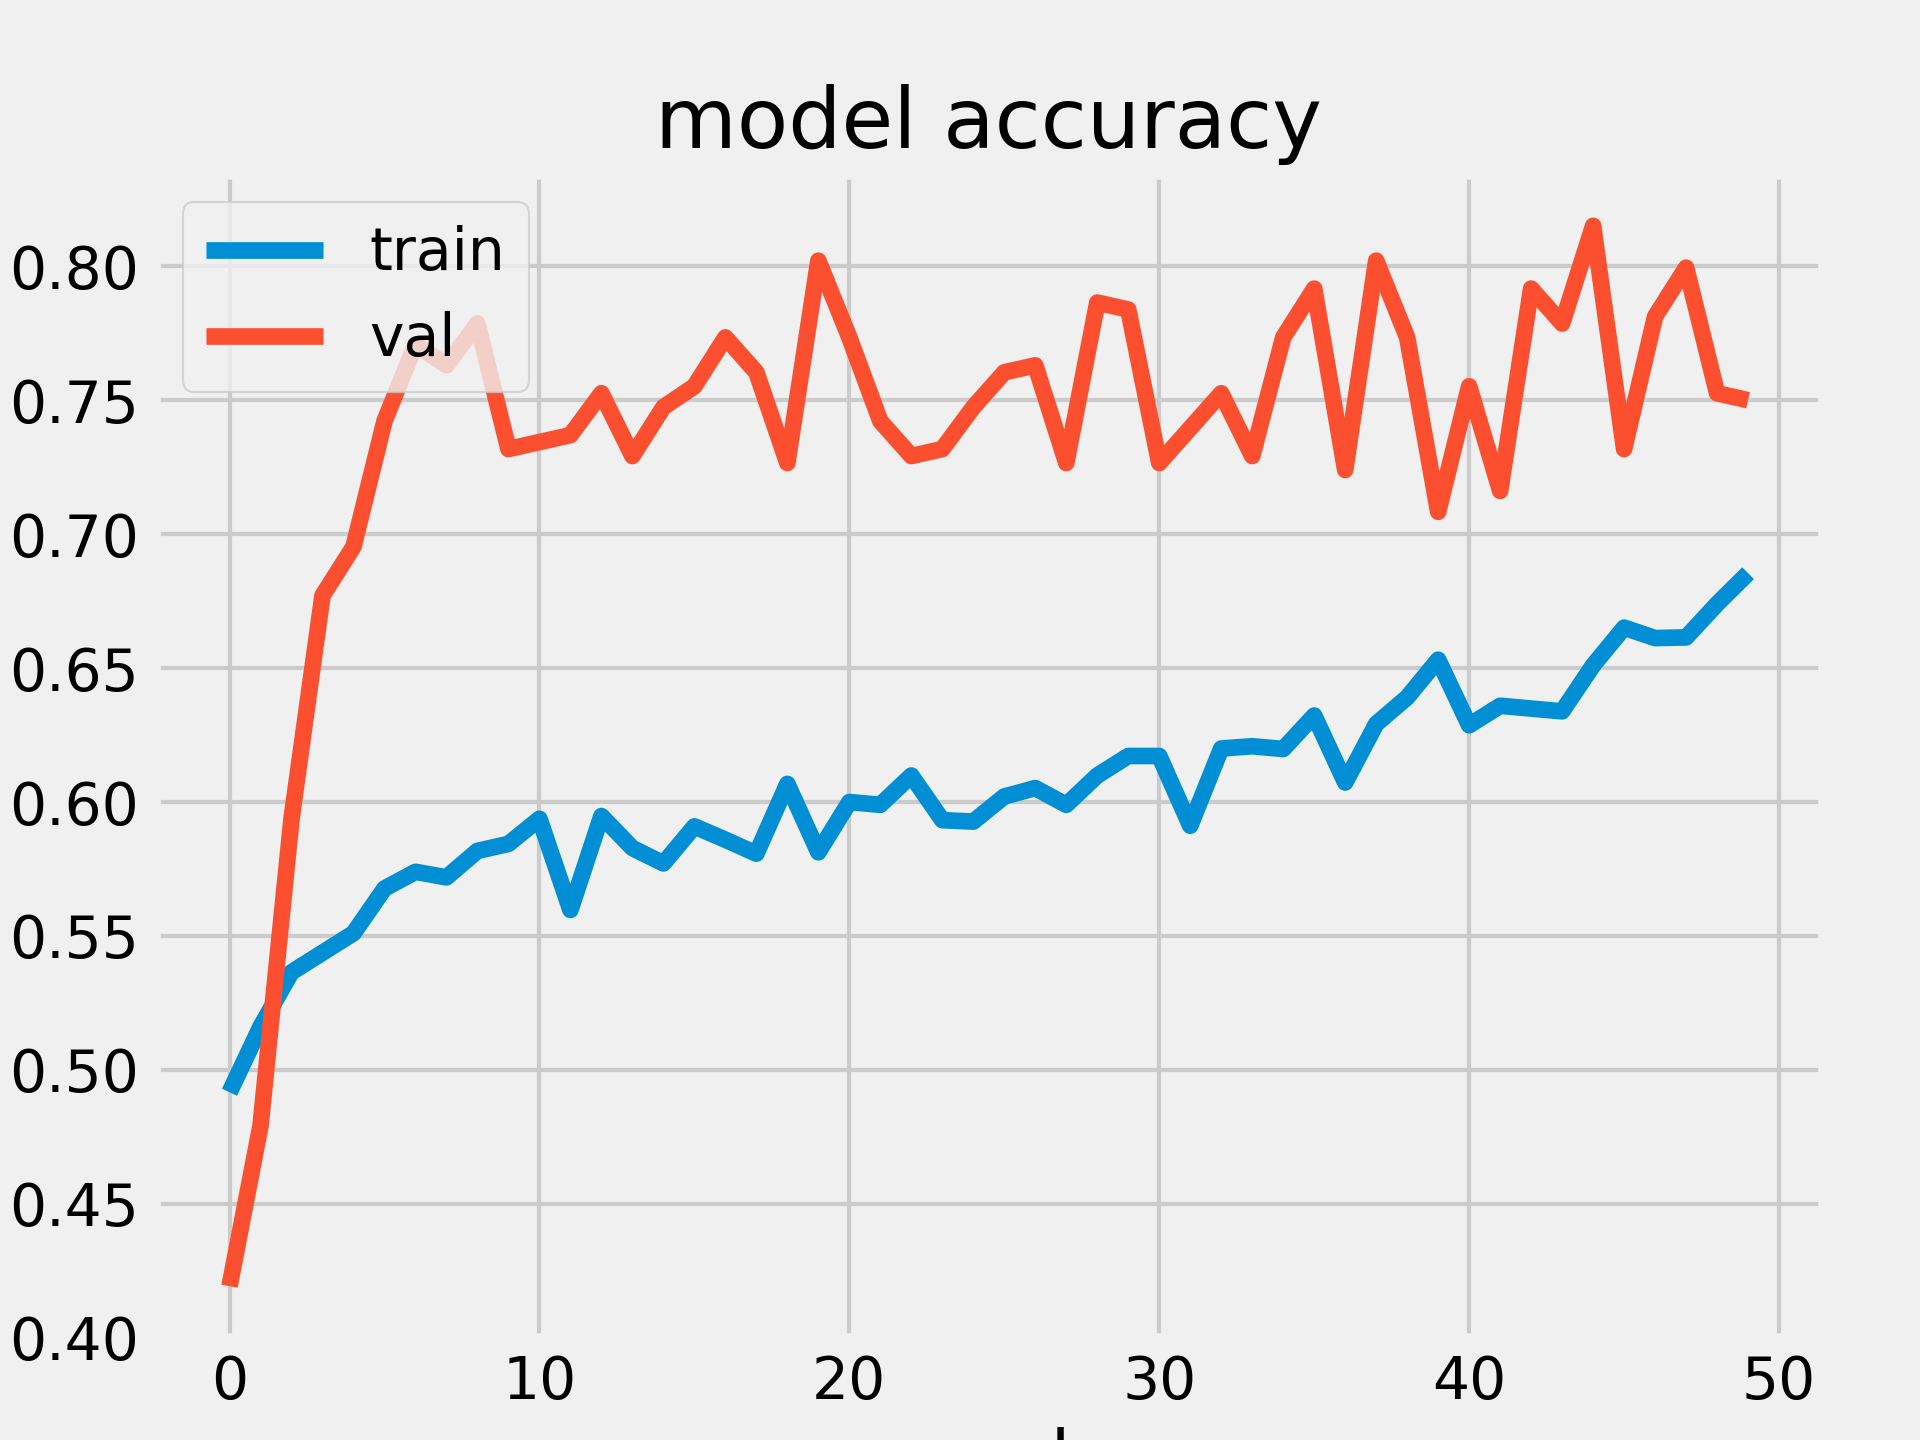

<i>why is the validation data a lot higher than the training data?</i> <= use of regularisation techniques such as drop out can cause this. It's nothing to worry about.

Finally understood how my code's labelling work, which is talked about here, in the section'The Issue':
https://medium.com/difference-engine-ai/keras-a-thing-you-should-know-about-keras-if-you-plan-to-train-a-deep-learning-model-on-a-large-fdd63ce66bd2 

It basically creates an array mapping of all the direcoties and the files within them :)

OMG, the graph is working with val_acc around 80\%!!! :D!

The model might even be not over-trained!!
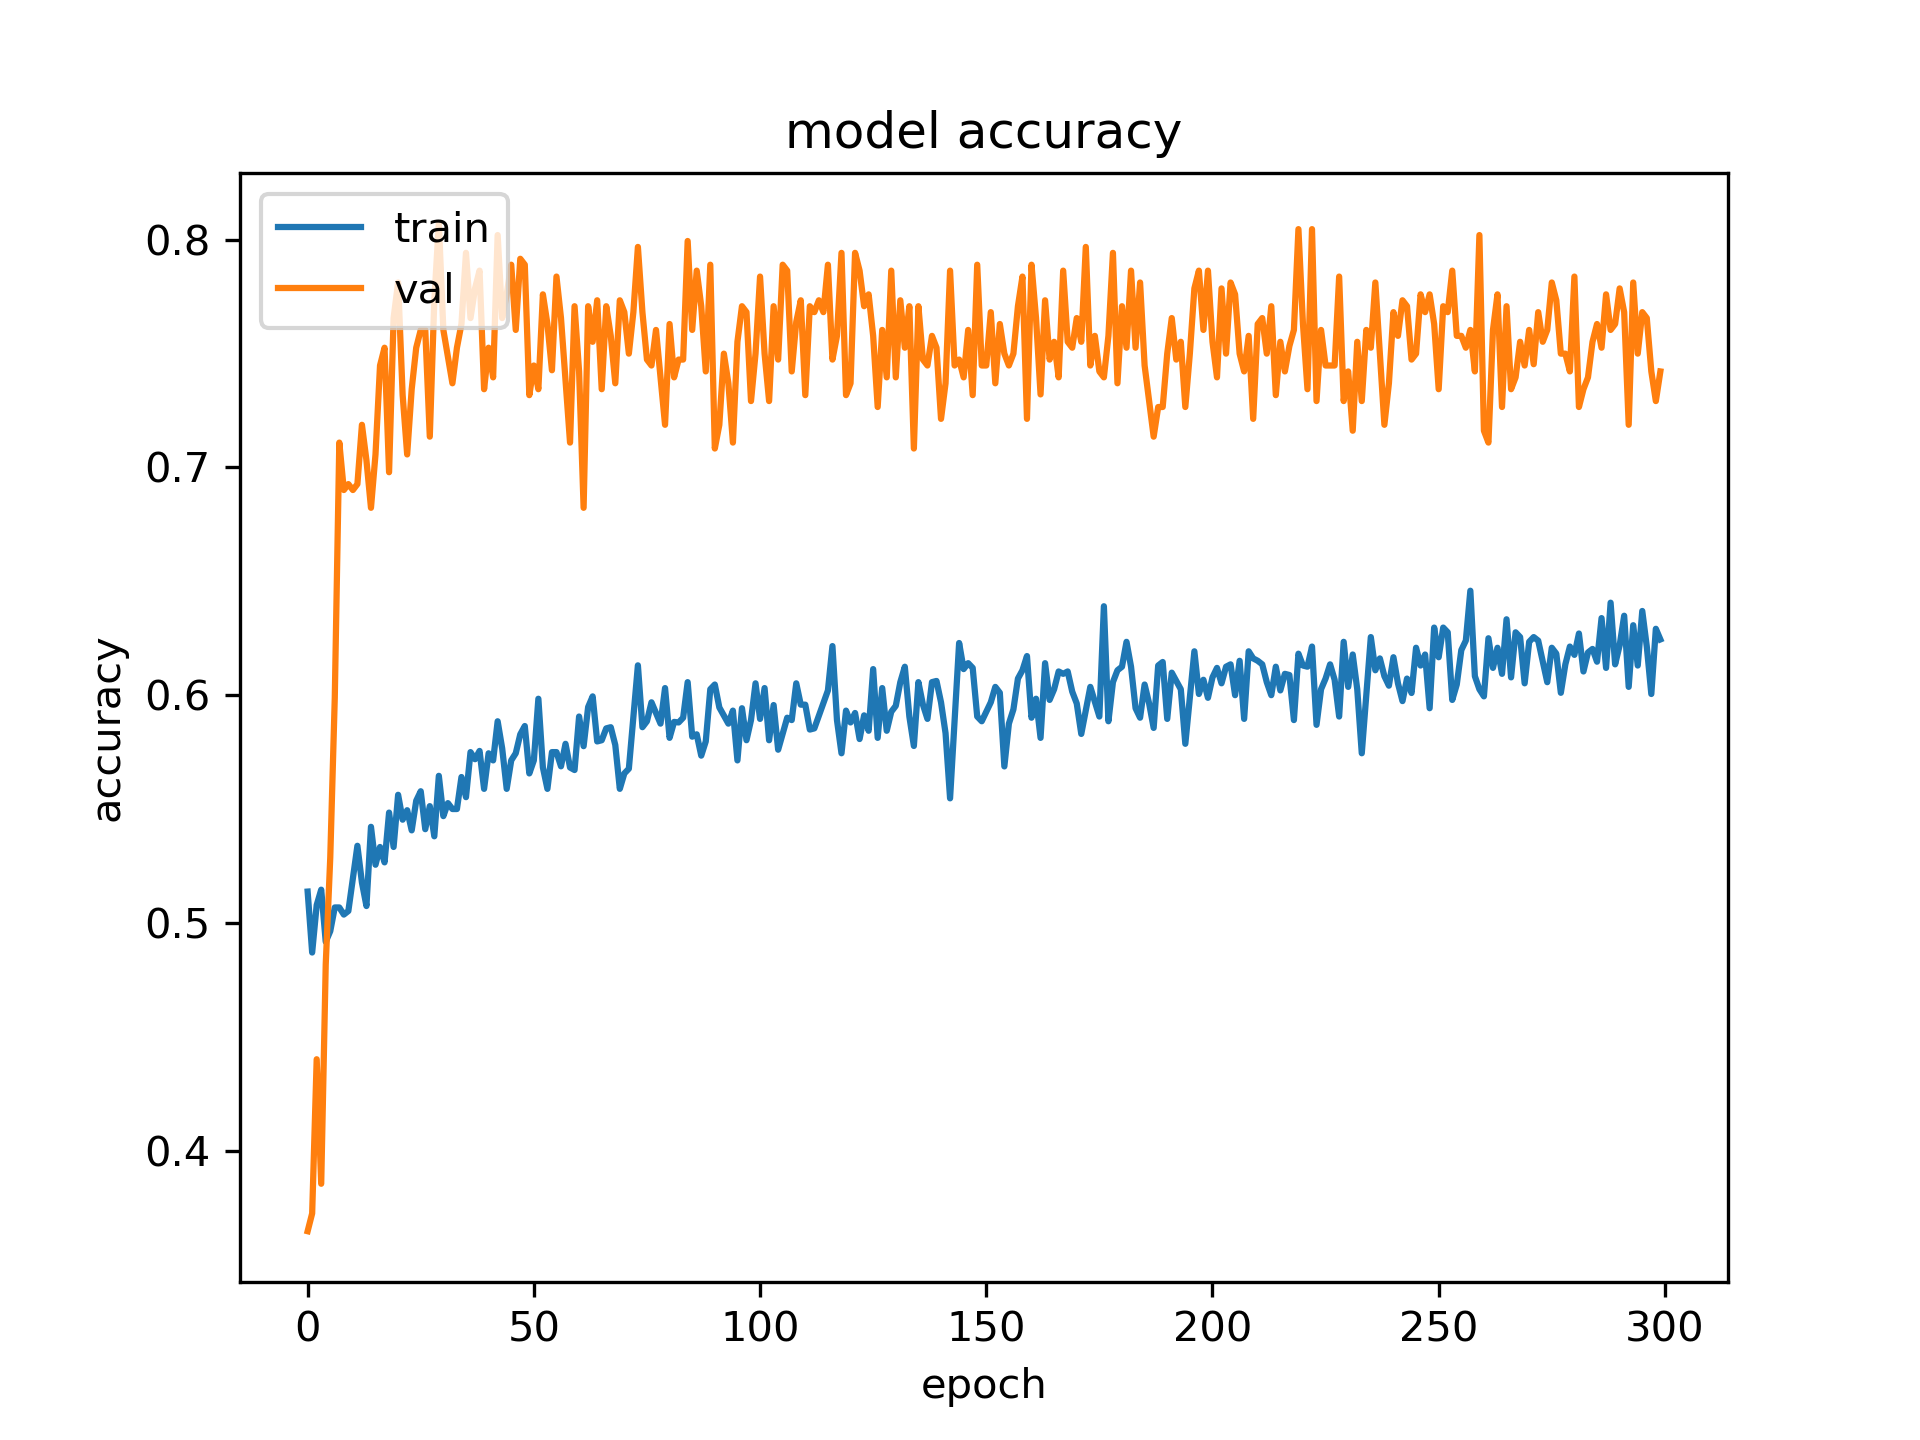